In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Simulate straight line and circular movements with Unicycle model

Robot is at the origin (0, 0) and facing North, i.e, $\theta = \pi/2$

Use the Kinematics equations we had developed in class for the Unicycle model

In [8]:
def unicycle_model(curr_pose, v, w, dt=1.0):
    ## write code to calculate next_pose
    # refer to the kinematic equations of a unicycle model
    x, y, theta = curr_pose
    x += v*np.cos(theta)*dt
    y += v*np.sin(theta)*dt
    theta += w*dt
    
    # Keep theta bounded between [-pi, pi]
    theta = np.arctan2(np.sin(theta), np.cos(theta))

    # return calculated (x, y, theta)
    return x, y, theta

Now let us try to simulate motion along a straight line and circle

Look at the kinematics equations you wrote - what should $v,\omega$ if
+ There is no change in $\theta$
+ $\theta$ has to change from 0 to 360 degrees

In [9]:
#straight line
straight_trajectory = []
pose = (0, 0, np.pi/2)
steps = 10
#fill in v and omega values
all_v = np.ones(steps)
all_w = np.zeros(steps)
for v, w in zip(all_v, all_w):
   # store pose
   straight_trajectory.append(pose)
   #instruction to take v, w and compute new pose    
   pose = unicycle_model(pose, v, w)
straight_trajectory = np.array(straight_trajectory)
    

In [10]:
#straight line
circular_trajectory = []
pose = (0, 0, np.pi/2)
steps = 100
#fill in v and omega values
all_v = np.ones(steps)
all_w = np.ones(steps)
for v, w in zip(all_v, all_w):
   # store pose
   circular_trajectory.append(pose)
   #instruction to take v, w and compute new pose    
   pose = unicycle_model(pose, v, w, 0.1)
circular_trajectory = np.array(circular_trajectory)
    

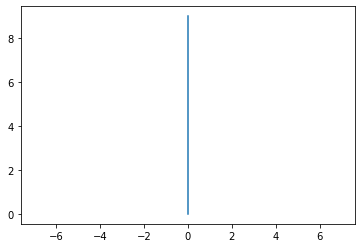

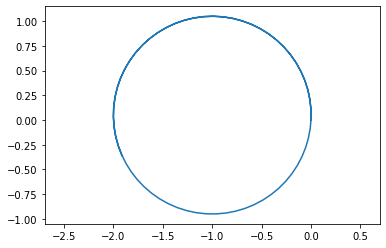

In [11]:
### Plot straight and circular trajectories
plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(straight_trajectory[:,0], straight_trajectory[:,1])

### Plot straight and circular trajectories
plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(circular_trajectory[:,0], circular_trajectory[:,1])
plt.show()

### Simulate Unicycle model with Open Loop control

We want the robot to follow these instructions

**straight 10m, right turn, straight 5m, left turn, straight 8m, right turn**

It is in open loop; control commands have to be calculated upfront. How do we do it?

To keep things simple in the first iteration, we can fix $v = v_c$ and change only $\omega$. To make it even simpler, $\omega$ can take only 2 values 
+ 0 when the vehicle is going straight 
+ $\omega = \omega_c$ when turning

This leaves only 1 question to be answered
* When should $\omega$ change from 0 and back?

In [ ]:
vc = 1 #m/s
wc = np.pi/6 #rad/s

#calculate time taken to finish a quarter turn (pi/2)
t_turn = int(np.pi/2/wc)

#calculate the time taken to finish straight segments
# omega array is to be padded with equivalent zeros

t_straight1, t_straight2, t_straight3 = int(10/vc), int(5/vc), int(8/ vc)

all_w = [0]*t_straight1 + [wc]*t_turn + \
        [0]*t_straight2 + [wc]*t_turn + \
        [0]*t_straight3 + [-wc]*t_turn

all_v = vc*np.ones_like(all_w)

Let us make a cool function out of this!

Take in as input a generic route and convert it into open-loop commands

Input format: [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]

Output: all_v, all_w

In [20]:
def get_open_loop_commands(route,vc=0.5,wc=np.pi/12,dt=1.0):
  all_w = []
  w_values = {'straight': 0.0, 'left': wc, 'right': -wc}
  for manoeuvre, distance in route:
    if(manoeuvre == 'straight'):
      t = 
    else:
      t = 
    all_w.extend([w_values[manoeuvre]] * t) 
  all_v = vc * np.ones_like(all_w)
  print("all_w:",all_w)
  print("all_v:",all_v)
  return all_v, all_w

In [21]:
all_v, all_w = get_open_loop_commands([("straight", 5), ("right", 90), ("straight", 6), ("left", 85)],1,np.pi/12)
print(len(all_w))

25


In [22]:
robot_trajectory = []
pose = (0, 0, np.pi/2)
for v, w in zip(all_v, all_w):
    #instruction to take v, w and compute new pose    
    robot_trajectory.append(pose)      
    new_pose = unicycle_model(pose, v, w)
   # store new pose
    pose = new_pose
robot_trajectory = np.array(robot_trajectory)

25


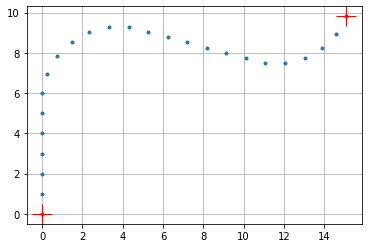

In [23]:
# plot robot trajectory
plt.figure()
plt.grid()
print(len(robot_trajectory))
plt.plot(robot_trajectory[:,0],robot_trajectory[:,1],'.')

#show first and last robot positions with + markers
x0,y0,_ = robot_trajectory[0,:]
xf,yf,_ = robot_trajectory[-1,:]
# example: plt.plot(0, 0, 'r+', ms=10)
plt.plot(xf,yf,'r+',ms = 20)
plt.plot(x0,y0,'r+',ms = 20)

### Improved capabilities!

+ Slow the robot while turning ($v_c$ for turn and straight needed)

+ How to accommodate a sampling time < 1.0s (hint: think of sampling instances instead of time)